In [76]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_2003 = pd.read_csv("fdi_paises_no_dirig_2003_w.csv", encoding="latin-1")
df_2007 = pd.read_csv("fdi_paises_no_dirig_2007_w.csv", encoding="latin-1")
df_2012 = pd.read_csv("fdi_paises_no_dirig_2012_w.csv", encoding="latin-1")

In [26]:
rango = [i for i in range(0, 120,3)]

clust_2003 = []
clust_2007 = []
clust_2012 = []

degree_centrality_2003 = []
degree_centrality_2007 = []
degree_centrality_2012 = []

betweenness_centrality_2003 = []
betweenness_centrality_2007 = []
betweenness_centrality_2012 = []

closeness_centrality_2003 = []
closeness_centrality_2007 = []
closeness_centrality_2012 = []


In [27]:
for i in rango:

    df_2003_nw = df_2003.loc[df_2003["Value"]>i]
    df_2007_nw = df_2007.loc[df_2007["Value"]>i]
    df_2012_nw = df_2012.loc[df_2012["Value"]>i]
    
    # Armo los grafos

    g_2003=nx.from_pandas_edgelist(df_2003_nw, source="Partner country", target="Reporting country", edge_attr= ["Year", "Value"])
    g_2007=nx.from_pandas_edgelist(df_2007_nw, source="Partner country", target="Reporting country", edge_attr= ["Year", "Value"])
    g_2012=nx.from_pandas_edgelist(df_2012_nw, source="Partner country", target="Reporting country", edge_attr= ["Year", "Value"])
    
    
    # Computo coef de clustering, grado medio, betweenness y centralidad de cercania 
    clust_2003_i = nx.average_clustering(g_2003)
    clust_2007_i = nx.average_clustering(g_2007)
    clust_2012_i = nx.average_clustering(g_2012)
    
    degree_centrality_2003_i = np.mean(list(nx.degree_centrality(g_2003).values())) 
    degree_centrality_2007_i = np.mean(list(nx.degree_centrality(g_2007).values())) 
    degree_centrality_2012_i = np.mean(list(nx.degree_centrality(g_2012).values())) 
    
    betweenness_centrality_2003_i = np.max(list(nx.betweenness_centrality(g_2003).values()))
    betweenness_centrality_2007_i = np.max(list(nx.betweenness_centrality(g_2007).values()))
    betweenness_centrality_2012_i = np.max(list(nx.betweenness_centrality(g_2012).values()))
    
    closeness_centrality_2003_i = np.mean(list(nx.closeness_centrality(g_2003).values()))
    closeness_centrality_2007_i = np.mean(list(nx.closeness_centrality(g_2007).values()))
    closeness_centrality_2012_i = np.mean(list(nx.closeness_centrality(g_2012).values()))
    
    clust_2003.append(clust_2003_i)
    clust_2007.append(clust_2007_i)
    clust_2012.append(clust_2012_i)
    
    degree_centrality_2003.append(degree_centrality_2003_i)
    degree_centrality_2007.append(degree_centrality_2007_i)
    degree_centrality_2012.append(degree_centrality_2012_i)

    betweenness_centrality_2003.append(betweenness_centrality_2003_i)
    betweenness_centrality_2007.append(betweenness_centrality_2007_i)
    betweenness_centrality_2012.append(betweenness_centrality_2012_i)

    closeness_centrality_2003.append(closeness_centrality_2003_i)
    closeness_centrality_2007.append(closeness_centrality_2007_i)
    closeness_centrality_2012.append(closeness_centrality_2012_i)    
    

In [122]:
resultados = pd.DataFrame({"delta" : rango, "coef_clust_2003" : clust_2003, "coef_clust_2007" : clust_2007, "coef_clust_2012" :clust_2012, "degree_2003" : degree_centrality_2003, "degree_2007" : degree_centrality_2007, "degree_2012" : degree_centrality_2012, "betweenness_2003" : betweenness_centrality_2003, "betweenness_2007" :betweenness_centrality_2007, "betweenness_2012" : betweenness_centrality_2012, "closeness_2003" : closeness_centrality_2003, "closeness_2007" :closeness_centrality_2007, "closeness_2012" :closeness_centrality_2012})
resultados.head()

,betweenness_2003,betweenness_2007,betweenness_2012,closeness_2003,closeness_2007,closeness_2012,coef_clust_2003,coef_clust_2007,coef_clust_2012,degree_2003,degree_2007,degree_2012,delta
0,0.236337,0.132871,0.236462,0.475378,0.488968,0.494615,0.726616,0.715972,0.644984,0.065783,0.087973,0.077041,0
1,0.268622,0.144246,0.146382,0.459857,0.476222,0.465302,0.601600,0.684073,0.592500,0.061453,0.082667,0.074742,3
2,0.220118,0.145099,0.143967,0.461737,0.476620,0.458567,0.596596,0.692713,0.574954,0.066789,0.084792,0.073652,6
3,0.221345,0.144129,0.149650,0.461102,0.475393,0.453140,0.586232,0.691924,0.551838,0.065629,0.085189,0.073253,9
4,0.230051,0.138450,0.165192,0.466353,0.479903,0.453377,0.605974,0.688633,0.519585,0.068725,0.090033,0.074540,12


In [147]:
resultados_long = pd.melt(resultados,
                       ["delta"],
                       var_name="metrica",
                       value_name="valor")

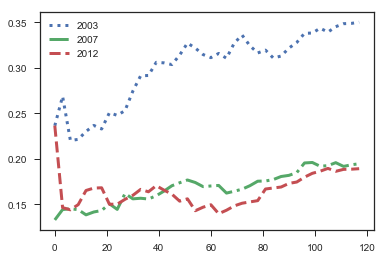

In [199]:
%matplotlib inline
resultados.set_index("delta")
sns.set_style("ticks")
plt.plot(resultados["delta"],resultados["betweenness_2003"],linestyle=':', linewidth = 3)
plt.plot(resultados["delta"],resultados["betweenness_2007"], linestyle = '-.', linewidth = 3)
plt.plot(resultados["delta"], resultados["betweenness_2012"],  linestyle = '--', linewidth = 3)
plt.legend([2003,2007,2012])
plt.show()

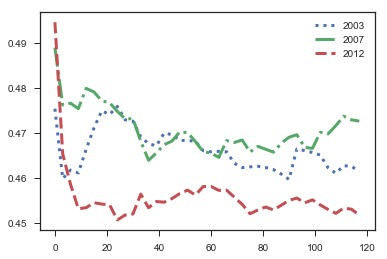

In [200]:
plt.plot(resultados["delta"],resultados["closeness_2003"],linestyle=':', linewidth = 3)
plt.plot(resultados["delta"],resultados["closeness_2007"], linestyle = '-.', linewidth = 3)
plt.plot(resultados["delta"],resultados["closeness_2012"], linestyle = '--', linewidth = 3)

plt.legend([2003,2007,2012])
plt.show()

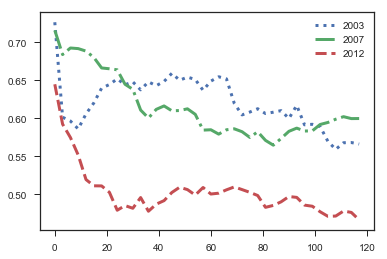

In [201]:
plt.plot(resultados["delta"],resultados["coef_clust_2003"],linestyle=':', linewidth = 3)
plt.plot(resultados["delta"],resultados["coef_clust_2007"], linestyle = '-.', linewidth = 3)
plt.plot(resultados["delta"],resultados["coef_clust_2012"], linestyle = '--', linewidth = 3)
plt.legend([2003,2007,2012])
plt.show()

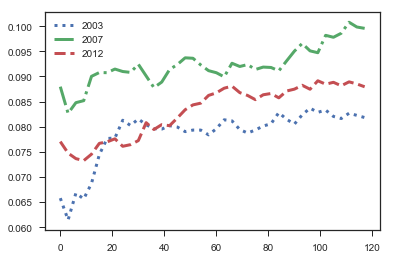

In [282]:
plt.plot(resultados["delta"],resultados["degree_2003"],linestyle=':', linewidth = 3)
plt.plot(resultados["delta"],resultados["degree_2007"], linestyle = '-.', linewidth = 3)
plt.plot(resultados["delta"],resultados["degree_2012"], linestyle = '--', linewidth = 3)

plt.legend([2003,2007,2012])
plt.show()

In [205]:
import community
#tomamos delta = 50
df_2003_nw = df_2003.loc[df_2003["Value"]>50]
df_2007_nw = df_2007.loc[df_2007["Value"]>50]
df_2012_nw = df_2012.loc[df_2012["Value"]>50]

g_2003=nx.from_pandas_edgelist(df_2003_nw, source="Partner country", target="Reporting country", edge_attr= ["Year", "Value"])
g_2007=nx.from_pandas_edgelist(df_2007_nw, source="Partner country", target="Reporting country", edge_attr= ["Year", "Value"])
g_2012=nx.from_pandas_edgelist(df_2012_nw, source="Partner country", target="Reporting country", edge_attr= ["Year", "Value"])
  
partition_2003 = community.best_partition(g_2003)
partition_2007 = community.best_partition(g_2007)
partition_2012 = community.best_partition(g_2012)


In [243]:
print(np.unique(list(partition_2003.values())))
print(np.unique(list(partition_2007.values())))
print(np.unique(list(partition_2012.values())))

[0 1 2 3 4 5 6]
[0 1 2 3 4 5]
[0 1 2 3 4 5]


In [272]:
partition_2003_keys, partition_2003_values = np.array(list(partition_2003.keys())), np.array(list(partition_2003.values()))
partition_2007_keys, partition_2007_values = np.array(list(partition_2007.keys())), np.array(list(partition_2007.values()))
partition_2012_keys, partition_2012_values = np.array(list(partition_2012.keys())), np.array(list(partition_2012.values()))

unique_2003, counts_2003 = np.unique(partition_2003_values, return_counts=True)
unique_2007, counts_2007 = np.unique(partition_2007_values, return_counts=True)
unique_2012, counts_2012 = np.unique(partition_2012_values, return_counts=True)

d1 = dict(zip(unique_2003, counts_2003))
d2 = dict(zip(unique_2007, counts_2007))
d3 = dict(zip(unique_2012, counts_2012))

print(d1)
print(d2)
print(d3)


{0: 27, 1: 12, 2: 14, 3: 20, 4: 13, 5: 16, 6: 13}
{0: 21, 1: 27, 2: 28, 3: 14, 4: 38, 5: 13}
{0: 34, 1: 17, 2: 22, 3: 25, 4: 33, 5: 10}


In [281]:
partition_2012_keys[partition_2012_values == 4]


array(['Argentina', 'Belgium', 'Chile', 'Japan', 'United States', 'Korea',
       'Bahamas', 'Barbados', 'Brazil', 'Mexico', 'Cambodia (Kampuchea)',
       'Colombia', 'Ecuador', 'Egypt', 'Equatorial Guinea', 'Guinea',
       'Honduras', 'Iraq', 'Libya', 'Madagascar', 'Myanmar',
       'Netherlands Antilles', 'NewZealand', 'Norway', 'Panama', 'Peru',
       'St. Lucia', 'Taiwan, Province of China', 'Thailand',
       'United Arab Emirates', 'Uruguay', 'Virgin Islands, U.S.',
       'VirginIslands, British'],
      dtype='<U32')

In [227]:
partition_2003

{'Algeria': 0,
 'Argentina': 1,
 'Aruba': 0,
 'Australia': 5,
 'Austria': 6,
 'Azerbaijan': 0,
 'Bahamas': 0,
 'Bahrain': 0,
 'Barbados': 0,
 'Belgium': 5,
 'Bermuda': 0,
 'Brazil': 3,
 'Bulgaria': 6,
 'Cameroon': 2,
 'Canada': 3,
 'Cayman Islands': 5,
 'Chile': 3,
 'China': 5,
 'Colombia': 4,
 'Congo': 2,
 'Costa Rica': 1,
 'Croatia': 6,
 'Cyprus': 6,
 'Czech Republic': 3,
 "Côte d'Ivoire": 0,
 'Denmark': 3,
 'Ecuador': 0,
 'Egypt': 0,
 'Equatorial Guinea': 0,
 'Estonia': 3,
 'Finland': 3,
 'France': 2,
 'French Franc zone': 2,
 'Germany': 5,
 'Ghana': 4,
 'Gibraltar': 0,
 'Greece': 3,
 'Guatemala': 0,
 'Guernsey': 2,
 'Honduras': 0,
 'HongKong': 5,
 'Hungary': 6,
 'Iceland': 4,
 'India': 1,
 'Indonesia': 5,
 'Iraq': 0,
 'Ireland': 3,
 'Isle of Man': 4,
 'Israel': 1,
 'Italy': 3,
 'Jamaica': 4,
 'Japan': 1,
 'Jersey': 2,
 'Kazakhstan': 2,
 'Kenya': 4,
 'Korea': 5,
 'Korea, Republic of (South Korea)': 5,
 'Kuwait': 2,
 'Latvia': 3,
 'Lebanon': 2,
 'Liberia': 5,
 'Liechtenstein': 3,
 'L

Se pueden usar distintos layout: "spring_layout", "circular_layout", "random_layout", "shell_layout", "spectral_layout",

In [286]:
nx.double_edge_swap(g_2003,10,100)

NetworkXAlgorithmError: Maximum number of swap attempts (100) exceeded before desired swaps achieved (20).

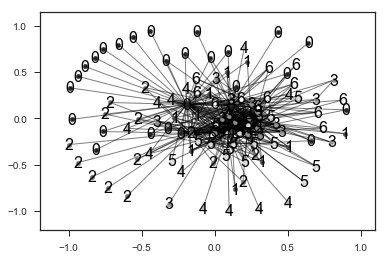

In [231]:
size = float(len(set(partition_2003.values())))
pos = nx.spring_layout(g_2003)
count = 0.
for com in set(partition_2003.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition_2003.keys()
                                if partition_2003[nodes] == com]
    nx.draw_networkx_nodes(g_2003, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))

# labels = partition_2003
nx.draw_networkx_edges(g_2003, pos, alpha=0.5)
nx.draw_networkx_labels(g_2003,pos,labels,font_size=16)

plt.show()

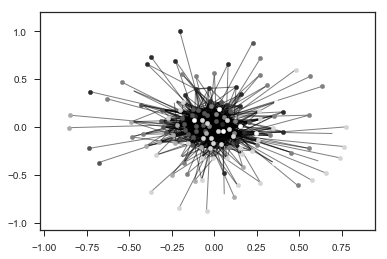

In [207]:
size = float(len(set(partition_2007.values())))
pos = nx.spring_layout(g_2007)
count = 0.
for com in set(partition_2007.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition_2007.keys()
                                if partition_2007[nodes] == com]
    nx.draw_networkx_nodes(g_2007, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(g_2007, pos, alpha=0.5)
plt.show()

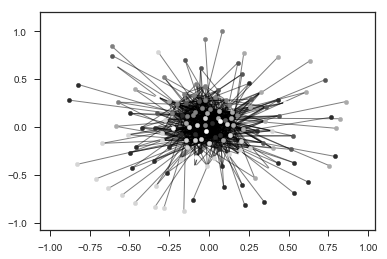

In [208]:
size = float(len(set(partition_2012.values())))
pos = nx.spring_layout(g_2012)
count = 0.
for com in set(partition_2012.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition_2012.keys()
                                if partition_2012[nodes] == com]
    nx.draw_networkx_nodes(g_2012, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))

nx.draw_networkx_edges(g_2012, pos, alpha=0.5)
plt.show()

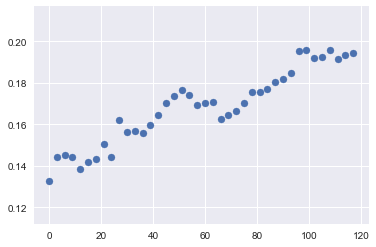

In [149]:
sns.set()
plt.scatter(y = resultados_long.loc[resultados_long["metrica"]=="betweenness_2007","valor"], x = resultados_long.loc[resultados_long["metrica"]=="betweenness_2007","delta"])
# plt.plot(y = resultados_long.loc[resultados_long["metrica"]=="betweenness_2012","valor"], x = resultados_long.loc[resultados_long["metrica"]=="betweenness_2012","delta"])
plt.show()